# save and restore model

In [1]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

tf.__version__

'1.12.0'

## 获取数据 

In [7]:
(train_data,train_label),(test_data,test_label) = keras.datasets.mnist.load_data()

# 获取其中小数据集进行训练和测试
train_label = train_label[:1000]
test_label = test_label[:1000]

train_data = train_data[:1000].reshape(-1,train_data[0].shape[0]*train_data[0].shape[1])/255.0
test_data = test_data[:1000].reshape(-1,test_data[0].shape[0]*test_data[0].shape[1])/255.0

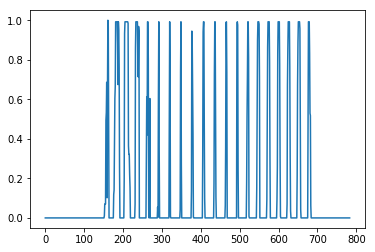

In [8]:
plt.plot(train_data[0])

## 定义模型 

In [20]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(512,activation = tf.nn.relu,input_shape = (784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation = tf.nn.softmax)
    ])
    
    model.compile(optimizer = "adam",
                 loss = "sparse_categorical_crossentropy",
                  metrics = ['accuracy']
                 )
    return model

In [21]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 在训练期间保存检查点 

### 检查点回调用法 

In [22]:
checkpoint_path = "train_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# 保存 weight
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

model.fit(train_data,train_label,epochs=10,validation_data=(test_data,test_label),callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 928/1000 [==========================>...] - ETA: 0s - loss: 1.2483 - acc: 0.6455
Epoch 00001: saving model to train_1/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 1s 1ms/step - loss: 1.2123 - acc: 0.6540 - val_loss: 0.7531 - val_acc: 0.7710
Epoch 2/10
 960/1000 [===========================>..] - ETA: 0s - loss: 0.4422 - acc: 0.8979
Epoch 00002: saving model to train_1/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 1s 603us/step - loss: 0.4407 - acc: 0.8970 - val_loss: 0.5413 - val_acc: 0.8230
Epoch 3/10
 928/1000 [==========================>...] - ETA: 0s - loss: 0.2861 - acc: 0.9192
Epoch 00003: saving model to train_1/cp.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 1s 515us/step - loss: 0.2871 - acc: 0.9180 - val_loss: 0.4674 - val_acc: 0.84

In [23]:
# 未训练模型的评估结果
model = build_model()
loss,acc = model.evaluate(test_data,test_label)
print(loss,acc)

1000/1000 [==============================] - 0s 211us/step
2.302290849685669 0.126


In [24]:
# 经过训练模型的评估结果
model = build_model()
# 加载训练好的 权重参数
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_data,test_label)
print(loss,acc)
# 准确率从 12% 提高到 87%

1000/1000 [==============================] - 0s 152us/step
0.4161755704879761 0.871


### 检查点回调选项 

In [32]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# 保存 weight;每训练 5 次才保存一次
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1,period=5)
model = build_model()
model.fit(train_data,train_label,epochs=10,validation_data=(test_data,test_label),callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 868us/step - loss: 1.2683 - acc: 0.6340 - val_loss: 0.7184 - val_acc: 0.7970
Epoch 2/10
1000/1000 [==============================] - 0s 338us/step - loss: 0.4257 - acc: 0.8850 - val_loss: 0.5540 - val_acc: 0.8260
Epoch 3/10
1000/1000 [==============================] - 0s 346us/step - loss: 0.2888 - acc: 0.9230 - val_loss: 0.4901 - val_acc: 0.8430
Epoch 4/10
1000/1000 [==============================] - 0s 331us/step - loss: 0.2202 - acc: 0.9370 - val_loss: 0.4454 - val_acc: 0.8610
Epoch 5/10
 992/1000 [============================>.] - ETA: 0s - loss: 0.1621 - acc: 0.9657
Epoch 00005: saving model to training_2/cp-0005.ckpt

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 1s 603us/step - loss: 0.1615 - acc: 0.9660 - val_loss: 0.4663 - val_acc: 0.8540
Epoch 6/10
1000/1000 [==============================] - 0s 332us/step - loss: 0.1

### 手动保存 

In [39]:
checkpoint_path = './checkpoints/my_checkpoint'

model = build_model()

model.fit(train_data,train_label,epochs=10,validation_data=(test_data,test_label),verbose = 2)
model.save_weights(checkpoint_path)

# 调出模型
model = build_model()
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_data,test_label)
print(loss,acc)

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 - 1s - loss: 1.1734 - acc: 0.6610 - val_loss: 0.7434 - val_acc: 0.7670
Epoch 2/10
 - 0s - loss: 0.4120 - acc: 0.8860 - val_loss: 0.5465 - val_acc: 0.8360
Epoch 3/10
 - 0s - loss: 0.2869 - acc: 0.9260 - val_loss: 0.5019 - val_acc: 0.8490
Epoch 4/10
 - 0s - loss: 0.2097 - acc: 0.9520 - val_loss: 0.4627 - val_acc: 0.8540
Epoch 5/10
 - 0s - loss: 0.1622 - acc: 0.9630 - val_loss: 0.4356 - val_acc: 0.8660
Epoch 6/10
 - 0s - loss: 0.1169 - acc: 0.9780 - val_loss: 0.4165 - val_acc: 0.8580
Epoch 7/10
 - 0s - loss: 0.0923 - acc: 0.9820 - val_loss: 0.4303 - val_acc: 0.8550
Epoch 8/10
 - 0s - loss: 0.0689 - acc: 0.9960 - val_loss: 0.4190 - val_acc: 0.8670
Epoch 9/10
 - 0s - loss: 0.0514 - acc: 0.9980 - val_loss: 0.4333 - val_acc: 0.8660
Epoch 10/10
 - 0s - loss: 0.0401 - acc: 1.0000 - val_loss: 0.4083 - val_acc: 0.8760

Consider using a TensorFlow optimizer from `tf.train`.
1000/1000 [==============================] - 0s 315us/step
0.4082

## 保存整个模型

In [43]:
# 固定为 h5 文件格式

model_path = "my_mdel.h5"
model_dir = os.path.dirname(model_path)
# 保存权值、模型架构、优化
# 不会自己创建文件夹
model.save(model_path)

# 直接载入 model 相当于创建模型对象
restore_model = keras.models.load_model(model_path)
loss,acc = restore_model.evaluate(test_data,test_label)
print(loss,acc)

1000/1000 [==============================] - 1s 662us/step
0.40828099942207335 0.876
